## Решетки, tic tac toe, Гежес Петр

In [23]:
import io
import copy
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt

%matplotlib inline

### Данные

In [2]:
!head tic-tac-toe.data -n 2

x,x,x,x,o,o,x,o,o,positive
x,x,x,x,o,o,o,x,o,positive


Будем поддерживать два бинарных признака "есть крестик" и "есть нолик"

In [3]:
data = []
labels = []
inp = open('tic-tac-toe.data')
for line in inp:
    row = line.split(',')
    data_row = []
    for v in row[:-1]:
        # binarization
        if v == 'o':
            data_row += [1, 0]
        elif v == 'x':
            data_row += [0, 1]
        else:
            data_row += [0, 0]
    data.append(data_row)
    labels.append(1 if row[-1].startswith('pos') else 0)

for i in range(2):
    print(data[i], labels[i])

[0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0] 1
[0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0] 1


In [4]:
indices = np.random.permutation(len(data))
data = np.array(data)
labels = np.array(labels)
test_idx = indices[:len(data) // 3]
train_idx = indices[len(data) // 3:]
X_train = data[train_idx]
y_train = labels[train_idx]
X_test = data[test_idx]
y_test = labels[test_idx]

### Генераторы

Классическое решение через поддержку в положительном и отрицательном контекстах + вес покрытия 

In [12]:
def get_supp(x_test, X):
    closure_power = 0
    for x in X:
        covered_idx = (x_test == x)
        weight = np.sum(covered_idx) / len(x)
        closure_power += weight * np.sum(np.all(x_test[covered_idx] == X[:, covered_idx], axis=1)) - 1
    return closure_power / len(X)
    
def predict_all(X_test, X_train, y_train, supp_frac=0.8):
    y_pred = np.zeros(len(X_test), dtype=int)
    X_train_pos = np.array(X_train[y_train == 1])
    X_train_neg = np.array(X_train[y_train == 0])
    for i in range(len(X_test)):
        supp_pos = get_supp(X_test[i], X_train_pos)
        supp_neg = get_supp(X_test[i], X_train_neg)
        y_pred[i] = (supp_pos * supp_frac > supp_neg)
    return y_pred

In [13]:
y_pred = predict_all(X_test, X_train, y_train)
print(accuracy_score(y_test, y_pred), f1_score(y_test, y_pred))

0.74921630094 0.84375


In [18]:
acc_scores = []
f1_scores = []
supp_frac_range = np.arange(0.5, 0.9, 0.05)
for supp_frac in supp_frac_range:
    y_pred = predict_all(X_test, X_train, y_train, supp_frac)
    acc_scores.append(accuracy_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))

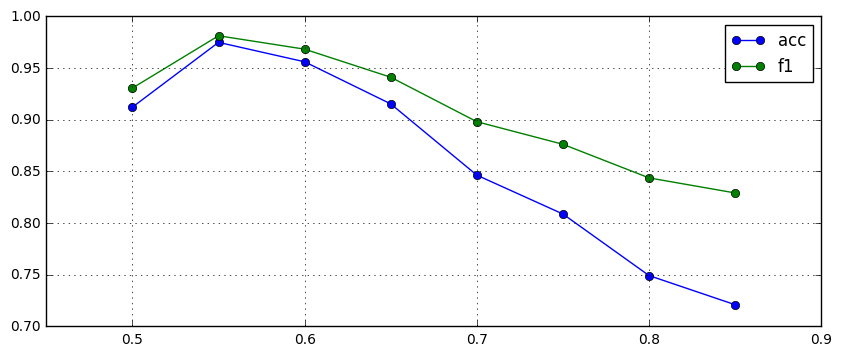

In [19]:
plt.figure(figsize=(10,4))
plt.grid(True)
plt.plot(supp_frac_range, acc_scores, '-o', label='acc')
plt.plot(supp_frac_range, f1_scores, '-o', label='f1')
plt.legend()
plt.show()

In [20]:
acc_scores = []
f1_scores = []
supp_frac_range = np.arange(0.5, 0.6, 0.01)
for supp_frac in supp_frac_range:
    y_pred = predict_all(X_test, X_train, y_train, supp_frac)
    acc_scores.append(accuracy_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))

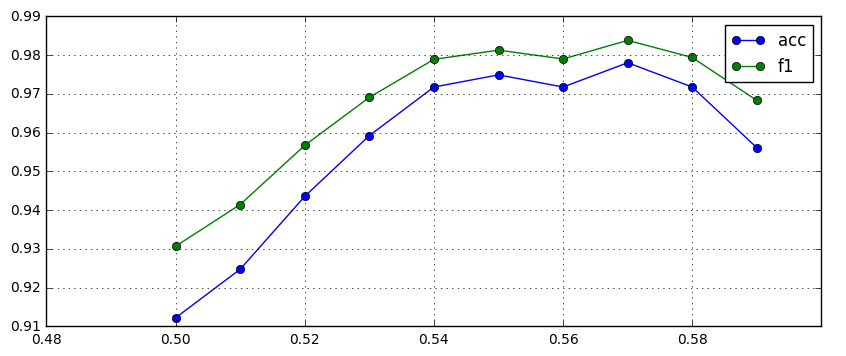

In [21]:
plt.figure(figsize=(10,4))
plt.grid(True)
plt.plot(supp_frac_range, acc_scores, '-o', label='acc')
plt.plot(supp_frac_range, f1_scores, '-o', label='f1')
plt.legend()
plt.show()

In [24]:
best_frac = supp_frac_range[np.argmax(f1_scores)]
print(best_frac)
y_pred = predict_all(X_test, X_train, y_train, best_frac)

0.57


In [26]:
print('acc: ' + str(accuracy_score(y_test, y_pred)))
print('prc: ' + str(precision_score(y_test, y_pred)))
print('rec: ' + str(recall_score(y_test, y_pred)))
print('f1 : ' + str(f1_score(y_test, y_pred)))

acc: 0.978056426332
prc: 0.981566820276
rec: 0.986111111111
f1 : 0.983833718245
